# Decision Tree Classification

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MachineLearning/Part3_Classification/Section19_Decision_Tree_Classification/Python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MachineLearning/Part3_Classification/Section19_Decision_Tree_Classification/Python


## Importing the dataset

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

len(X_train), len(X_test), len(y_train), len(y_test)

(300, 100, 300, 100)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [10]:
from sklearn.tree import DecisionTreeClassifier

classifier_gini = DecisionTreeClassifier(criterion="gini", random_state=0)
classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting a new result

In [12]:
classifier_gini.predict(sc.transform([[30,87000]]))

array([0])

In [13]:
classifier_entropy.predict(sc.transform([[30,87000]]))

array([0])

## Predicting the Test set results

In [14]:
y_pred = classifier_gini.predict(X_test)
np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

## Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  6]
 [ 4 28]]


0.9

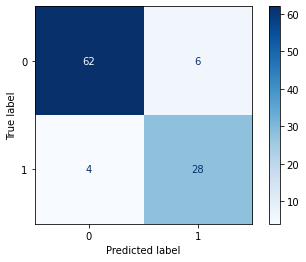

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier_gini, X_test, y_test, cmap="Blues")

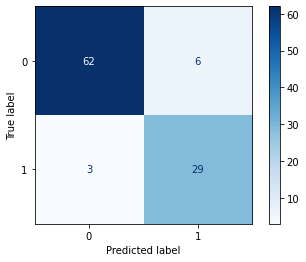

In [18]:
plot_confusion_matrix(classifier_entropy, X_test, y_test, cmap="Blues")

## Visualising the Training set results

No handles with labels found to put in legend.


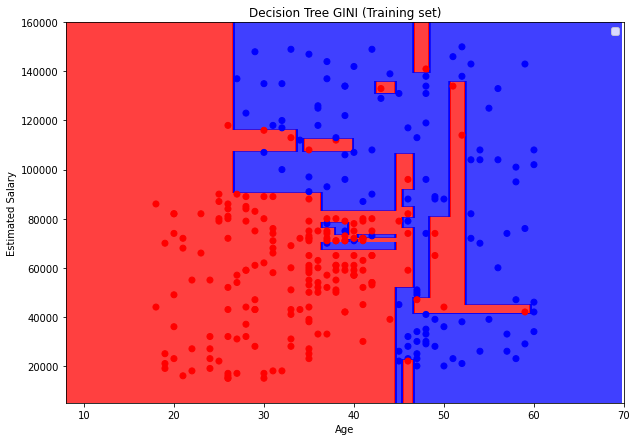

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train

X1_min, X1_max = X[:,0].min()-10, X[:,0].max()+10
X2_min, X2_max = X[:,1].min()-10000, X[:,1].max()+10000

X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, step=0.25),
                     np.arange(X2_min, X2_max, step=0.25))

X_in = np.array([X1.ravel(), X2.ravel()]).T
X_in = sc.transform(X_in)
# predict 
y_pred = classifier_gini.predict(X_in).reshape(X1.shape)
# plotting
plt.figure(figsize=(10,7))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red","blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_train, cmap=ListedColormap(("red", "blue")))
plt.title('Decision Tree GINI (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

No handles with labels found to put in legend.


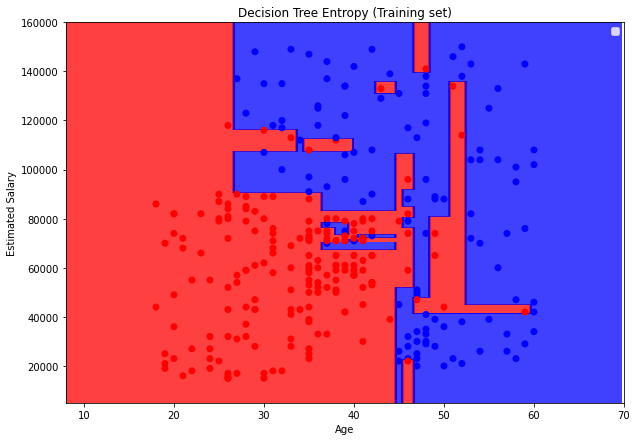

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train

X1_min, X1_max = X[:,0].min()-10, X[:,0].max()+10
X2_min, X2_max = X[:,1].min()-10000, X[:,1].max()+10000

X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, step=0.25),
                     np.arange(X2_min, X2_max, step=0.25))

X_in = np.array([X1.ravel(), X2.ravel()]).T
X_in = sc.transform(X_in)
# predict 
y_pred = classifier_gini.predict(X_in).reshape(X1.shape)
# plotting
plt.figure(figsize=(10,7))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red","blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_train, cmap=ListedColormap(("red", "blue")))
plt.title('Decision Tree Entropy (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

No handles with labels found to put in legend.


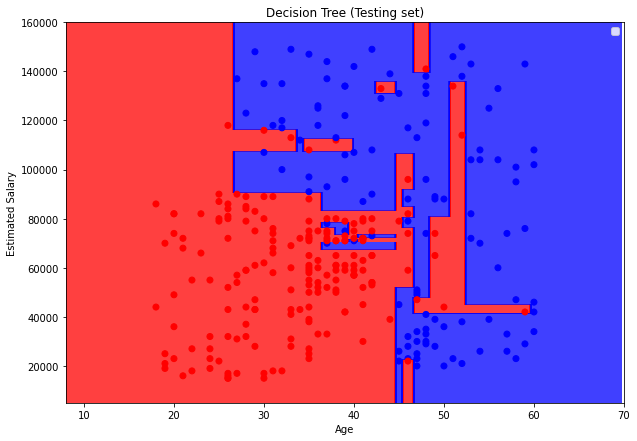

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train

X1_min, X1_max = X[:,0].min()-10, X[:,0].max()+10
X2_min, X2_max = X[:,1].min()-10000, X[:,1].max()+10000

X1, X2 = np.meshgrid(np.arange(X1_min, X1_max, step=0.25),
                     np.arange(X2_min, X2_max, step=0.25))

X_in = np.array([X1.ravel(), X2.ravel()]).T
X_in = sc.transform(X_in)
# predict 
y_pred = classifier_gini.predict(X_in).reshape(X1.shape)
# plotting
plt.figure(figsize=(10,7))
plt.xlim(X1_min, X1_max)
plt.ylim(X2_min, X2_max)

plt.contourf(X1, X2, y_pred, alpha=0.75, cmap=ListedColormap(("red","blue")))
plt.scatter(X_set[:,0], X_set[:,1], c=y_train, cmap=ListedColormap(("red", "blue")))
plt.title('Decision Tree (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()